## Exercise 1

Using regular expressions, extract all names from the dataset `yob2012.txt` (including the number of newborns registered in 2012 with their names and sex), which start with letters A to C. How many names did you find?

## Exercise 2

Given a data `uoe_tweets_07022019`, let do the following tasks:
1. Remove the `screen_name` and `created_at` columns.
2. It would be interesting to see how frequently the university has made posts. Can you group all posts according to their date of publication and then create a plot through time of how many posts have been made each day. </br>
You can use the `DataFrame.groupby()` method to find occurrences. Don't forget to label the axis of your plot. </br>
You can transfrom a `DataFrame.groupby()` object back into a DataFrame by using its `.count()` method
3. We would like to identify the 10 most favourited posts. This can easily be done using the [`nlargest`](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html) method and then simply indexing into the original dataframe. </br>
Find the 10 most popular posts, print them and see what they are about. </br>
You might want to use the `.iloc` method to index into the original data

## Exercise 1

In [12]:
import pandas as pd 
df = pd.read_fwf("yob2012.txt",header = None)
test = ['test']
df.columns = test
df['test'].str.split(',', expand=True)

,0,1,2
0,Sophia,F,22267
1,Emma,F,20902
2,Isabella,F,19058
3,Olivia,F,17277
4,Ava,F,15512
...,...,...,...
33679,Zylin,M,5
33680,Zymari,M,5
33681,Zyrin,M,5
33682,Zyrus,M,5


In [13]:
df[['Name', 'Gender', 'ID']] = df['test'].str.split(',', expand=True)
df

,test,Name,Gender,ID
0,"Sophia,F,22267",Sophia,F,22267
1,"Emma,F,20902",Emma,F,20902
2,"Isabella,F,19058",Isabella,F,19058
3,"Olivia,F,17277",Olivia,F,17277
4,"Ava,F,15512",Ava,F,15512
...,...,...,...,...
33679,"Zylin,M,5",Zylin,M,5
33680,"Zymari,M,5",Zymari,M,5
33681,"Zyrin,M,5",Zyrin,M,5
33682,"Zyrus,M,5",Zyrus,M,5


In [14]:
del df['test']
df['Name']

0           Sophia
1             Emma
2         Isabella
3           Olivia
4              Ava
           ...    
33679        Zylin
33680       Zymari
33681        Zyrin
33682        Zyrus
33683    Zytaevius
Name: Name, Length: 33684, dtype: object

In [15]:
df['Name'].str.startswith(('A','B','C'))

0        False
1        False
2        False
3        False
4         True
         ...  
33679    False
33680    False
33681    False
33682    False
33683    False
Name: Name, Length: 33684, dtype: bool

In [16]:
#Count Names start with letter A - C
count1 = sum(map(lambda word:word[0]=="A", df['Name']))
count2= sum(map(lambda word:word[0]=="B", df['Name']))
count3 = sum(map(lambda word:word[0]=="C", df['Name']))
count = count1 + count2 + count3
count

7606

## Exercise 2


In [17]:
df = pd.read_csv('uoe_tweets_07022019.csv')
df

,Unnamed: 0,text,screen_name,created_at,retweet_count,favorite_count
0,0,RT @EdinUniStaff: Congratulations to the three...,EdinburghUni,2019-02-07 09:54:30,1,0
1,1,The Erasmus+ programme provides tangible benef...,EdinburghUni,2019-02-06 16:42:02,18,30
2,2,.@EdinburghUni values the opportunities Erasmu...,EdinburghUni,2019-02-06 11:57:46,13,38
3,3,A study of the Universe involving Edinburgh’s ...,EdinburghUni,2019-02-05 17:08:06,3,4
4,4,"Over 200 genes have been linked to depression,...",EdinburghUni,2019-02-05 16:20:02,10,19
...,...,...,...,...,...,...
3208,3208,Analyse both sides of the #indyref debate and ...,EdinburghUni,2014-08-24 17:50:15,9,4
3209,3209,Authors join book prize's hall of fame http://...,EdinburghUni,2014-08-23 18:55:05,3,0
3210,3210,Farm technology bound for Africa http://t.co/E...,EdinburghUni,2014-08-22 13:39:00,2,1
3211,3211,Why is Scotland having an independence referen...,EdinburghUni,2014-08-20 14:18:03,8,5


In [18]:
#Task 1 
df1 = df.copy()
df1.drop(['screen_name','created_at'], axis=1, inplace=True)
df1.head()

,Unnamed: 0,text,retweet_count,favorite_count
0,0,RT @EdinUniStaff: Congratulations to the three...,1,0
1,1,The Erasmus+ programme provides tangible benef...,18,30
2,2,.@EdinburghUni values the opportunities Erasmu...,13,38
3,3,A study of the Universe involving Edinburgh’s ...,3,4
4,4,"Over 200 genes have been linked to depression,...",10,19


In [19]:
df['created_at'] = pd.to_datetime(df['created_at']).dt.date
df.head()

,Unnamed: 0,text,screen_name,created_at,retweet_count,favorite_count
0,0,RT @EdinUniStaff: Congratulations to the three...,EdinburghUni,2019-02-07,1,0
1,1,The Erasmus+ programme provides tangible benef...,EdinburghUni,2019-02-06,18,30
2,2,.@EdinburghUni values the opportunities Erasmu...,EdinburghUni,2019-02-06,13,38
3,3,A study of the Universe involving Edinburgh’s ...,EdinburghUni,2019-02-05,3,4
4,4,"Over 200 genes have been linked to depression,...",EdinburghUni,2019-02-05,10,19


<Axes: xlabel='created_at,screen_name'>

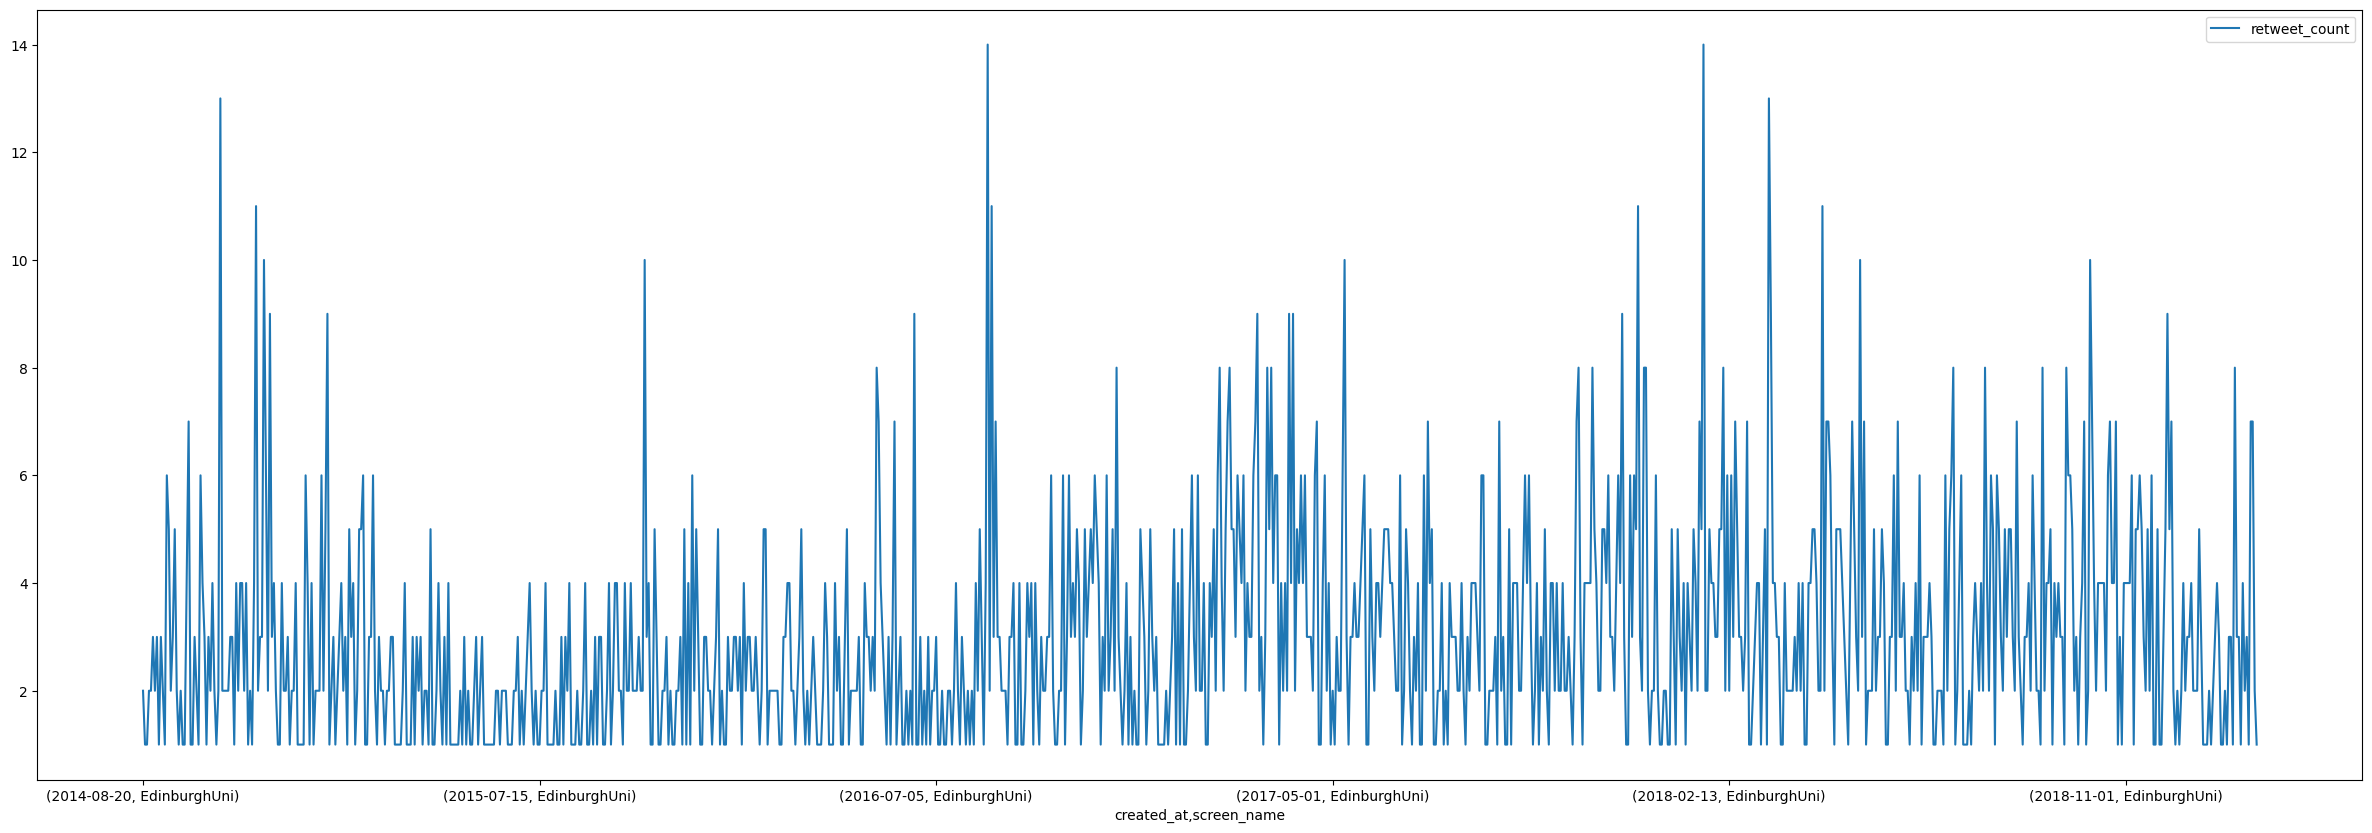

In [20]:
#Task 2 
import matplotlib.pyplot as plt
%matplotlib inline

new_df = df.groupby(['created_at', 'screen_name'])['retweet_count'].count()
fig, ax = plt.subplots(figsize=(30, 10))
new_df.plot(legend=True)

In [22]:
#Task 3 
df.iloc[df.nlargest(10, 'favorite_count').index]


,Unnamed: 0,text,screen_name,created_at,retweet_count,favorite_count
2625,2625,Tickets now available for public talk by Bolly...,EdinburghUni,2015-10-05,1764,3725
1434,1434,"Congratulations to Canadian PM @JustinTrudeau,...",EdinburghUni,2017-07-05,650,2553
1320,1320,Scientists have developed a camera that can se...,EdinburghUni,2017-09-04,546,798
591,591,We’re ranked in world top 20 in the QS​ World ...,EdinburghUni,2018-06-06,273,574
1033,1033,We’re number 2 on the @timeshighered list of 1...,EdinburghUni,2018-01-03,183,522
1688,1688,"""Edinburgh is and will remain a proudly #Europ...",EdinburghUni,2017-03-29,355,492
1594,1594,Celebrate dance today for the #InternationalDa...,EdinburghUni,2017-04-29,379,478
2606,2606,"Congratulations Dr Shah Rukh Khan, honorary gr...",EdinburghUni,2015-10-15,648,474
1034,1034,"Wishing all of our students, staff &amp; frien...",EdinburghUni,2018-01-01,98,463
965,965,Bill Gates says some of the world’s best resea...,EdinburghUni,2018-01-26,195,448
